In [7]:
#k-NN with Tsfresh
#検知したデータを用いてk-NN(100個学習100個推定)
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from pylab import rcParams
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import sklearn.preprocessing as preproc
import changefinder
import seaborn as sns
from tsfresh import extract_features, extract_relevant_features
from tsfresh.feature_selection.selection import select_features
from tsfresh.utilities.dataframe_functions import impute

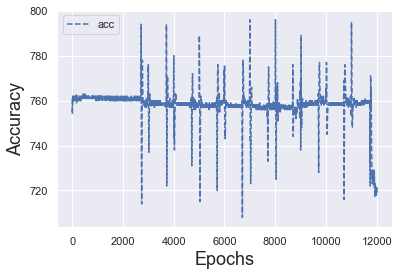

record:2702
record:3707
record:4695
record:5703
record:6692
record:7703
record:8691
record:9695
record:10699
record:11729
[[ 0.08234587  0.08234587  0.01343719 ... -0.05547149 -0.05547149
  -0.12438017]
 [-0.045231   -0.045231   -0.045231   ...  0.04707717  0.04707717
   0.04707717]
 [-0.00641856 -0.00641856 -0.00641856 ... -0.14905323 -0.14905323
  -0.2916879 ]
 ...
 [-0.06467844  0.03559821  0.03559821 ... -0.06467844 -0.06467844
   0.03559821]
 [-0.09967925 -0.09967925 -0.09967925 ...  0.0767442  -0.01146752
  -0.01146752]
 [ 0.53153627  0.53153627  0.53153627 ... -1.89342685 -2.28454993
  -1.89342685]]


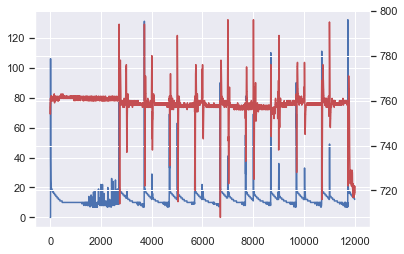

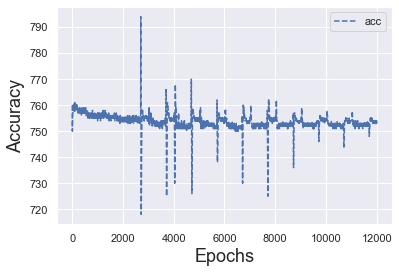

record:2697
record:3693
record:4689
record:5704
record:6694
record:7686
record:8710
record:9714
record:10701
record:11705
[[ 0.13106475  0.04339602  0.04339602 ...  0.21873348  0.21873348
   0.21873348]
 [-0.01371267 -0.01371267 -0.01371267 ...  0.46324979  0.46324979
   0.46324979]
 [ 0.03317605  0.03317605  0.03317605 ...  0.5157368   0.5157368
   0.5157368 ]
 ...
 [-0.48189987 -0.48189987 -0.48189987 ...  0.43600465  0.89495691
   0.43600465]
 [-0.07393556  0.31519896 -0.07393556 ...  0.70433348  0.70433348
   0.70433348]
 [-0.58163343  0.12767563  0.12767563 ...  0.83698469  0.83698469
   0.83698469]]


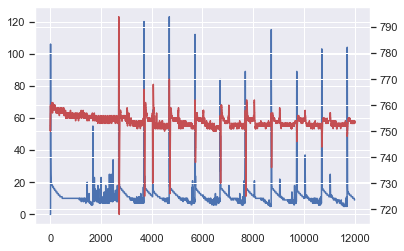

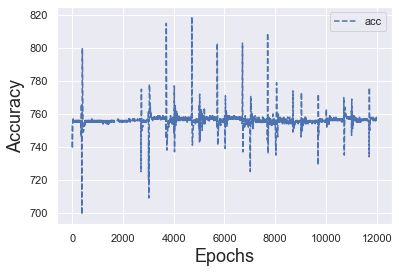

record:2707
record:3694
record:4711
record:5701
record:6701
record:7690
record:8691
record:9685
record:10704
record:11699
[[ 0.01079287  0.01079287  0.01079287 ...  0.01079287  0.01079287
   0.16497678]
 [ 0.10097781  0.02617943  0.02617943 ... -0.12341732 -0.12341732
  -0.04861894]
 [ 0.06177548  0.06177548  0.06177548 ... -0.11859088 -0.0284077
  -0.0284077 ]
 ...
 [-0.04945218 -0.04945218  0.14074852 ...  0.14074852  0.33094923
   0.14074852]
 [ 0.08648207  0.08648207  0.08648207 ...  0.40678601  0.40678601
   0.40678601]
 [-0.02048065 -0.02048065 -0.02048065 ...  0.17457318  0.17457318
   0.17457318]]


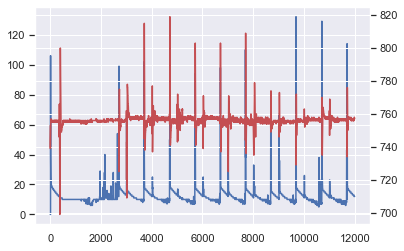

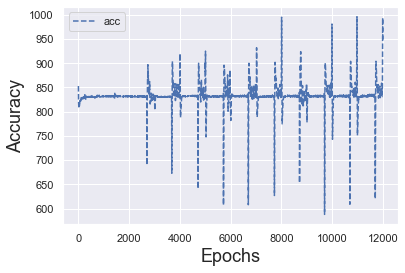

record:2696
record:3674
record:4712
record:5715
record:6694
record:7721
record:8713
record:9700
record:10699
record:11697
[[-0.11525205 -0.11525205 -0.11525205 ...  0.10017234  0.10017234
   0.06939743]
 [-0.08403039 -0.08403039 -0.10831663 ...  0.08597329  0.11025953
   0.11025953]
 [-0.07805154 -0.07805154 -0.10117793 ... -0.00867239 -0.03179878
  -0.05492516]
 ...
 [-0.0911452  -0.0911452  -0.0911452  ...  0.12308497  0.12308497
   0.1036095 ]
 [-0.09958776 -0.09958776 -0.09958776 ...  0.10159963  0.10159963
   0.10159963]
 [-0.0778607  -0.09826979 -0.09826979 ...  0.12623025  0.12623025
   0.10582116]]


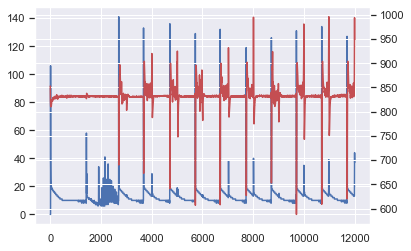

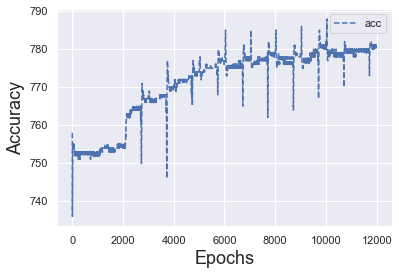

record:3701
record:4694
record:5649
record:6713
record:7702
record:8712
record:9703
record:10702
record:11709
[[-0.05051479 -0.05051479 -0.05051479 ...  0.45463308  0.45463308
   0.45463308]
 [-0.11576039 -0.11576039 -0.11576039 ...  1.08176091  1.08176091
   1.08176091]
 [ 0.25883004  0.25883004  0.25883004 ...  0.91409597  1.5693619
   2.22462783]
 ...
 [-0.13991375 -0.13991375 -0.13991375 ...  0.4430602   0.4430602
   0.4430602 ]
 [-0.26501958 -0.26501958 -0.26501958 ...  0.16943875  0.16943875
   0.16943875]
 [-0.01596942 -0.01596942 -0.01596942 ...  0.51634473  0.51634473
   0.51634473]]


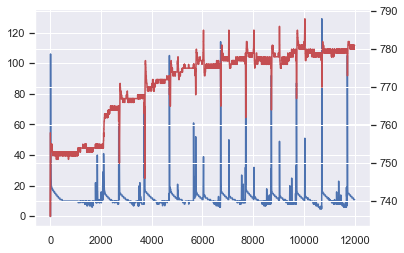

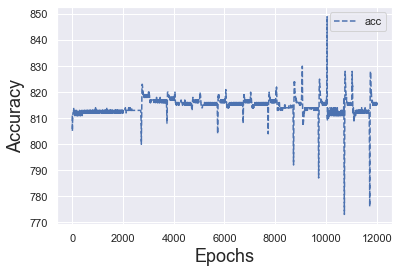

record:2702
record:3717
record:4706
record:5718
record:6724
record:7708
record:8706
record:9697
record:10703
record:11708
[[-0.36277062 -0.36277062 -0.36277062 ...  0.83978392  0.83978392
   0.83978392]
 [ 0.10902209  0.10902209  0.10902209 ...  0.49155576  0.49155576
   0.49155576]
 [ 0.09510007  0.09510007  0.09510007 ...  0.95964621  0.95964621
   0.95964621]
 ...
 [-0.04005625 -0.04005625 -0.04005625 ...  0.36729544  0.36729544
   0.36729544]
 [-0.13743864 -0.13743864 -0.13743864 ...  0.41048949  0.50181084
   0.41048949]
 [-0.14806557 -0.04935519 -0.14806557 ...  0.34548634  0.34548634
   0.34548634]]


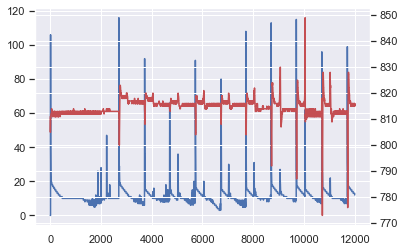

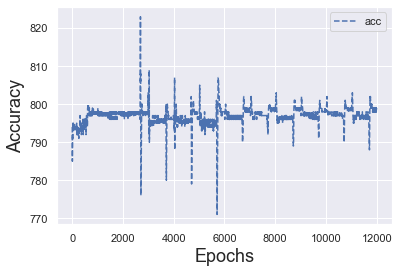

record:2679
record:4034
record:4681
record:5680
record:6711
record:8698
record:9699
record:10700
[[ 0.04661057  0.04661057  0.04661057 ...  0.18171366  0.18171366
   0.18171366]
 [-0.06161061 -0.06161061 -0.06161061 ... -0.88308535 -0.88308535
  -0.88308535]
 [ 0.21557224  0.0062788   0.0062788  ...  1.05274598  1.05274598
   1.05274598]
 ...
 [-0.19031917 -0.19031917 -0.19031917 ...  0.72321283  0.72321283
   0.72321283]
 [-0.02188965 -0.02188965 -0.02188965 ...  0.85369627  0.85369627
   0.85369627]
 [-0.07563496 -0.07563496 -0.07563496 ...  0.70010823  0.70010823
   0.70010823]]


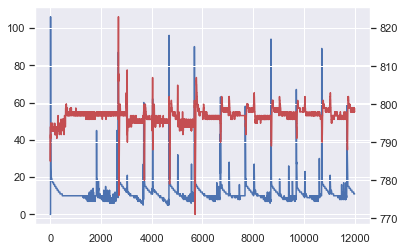

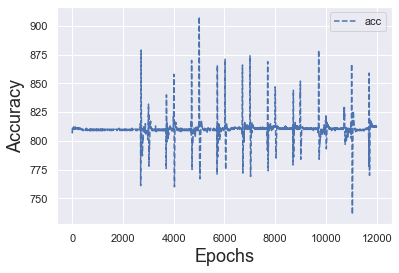

record:3697
record:4688
record:5704
record:6699
record:7686
record:8697
record:9708
record:10712
record:11687
[[ 0.07210613 -0.04707756 -0.04707756 ... -0.52381232 -0.40462863
  -0.40462863]
 [ 0.05977143 -0.01356775  0.05977143 ... -0.08690693 -0.08690693
  -0.08690693]
 [ 0.00380608  0.00380608  0.00380608 ...  0.07992768  0.07992768
   0.00380608]
 ...
 [ 0.11440678  0.11440678  0.04808401 ... -0.15088431 -0.21720708
  -0.21720708]
 [ 0.15662411  0.15662411  0.15662411 ... -1.03104687 -1.03104687
  -0.882588  ]
 [-0.03364955 -0.03364955 -0.03364955 ...  0.29869173  0.21560641
   0.29869173]]


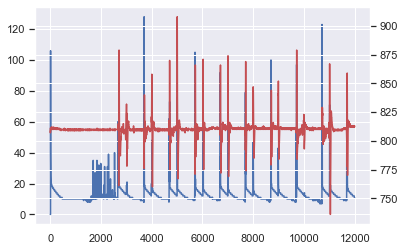

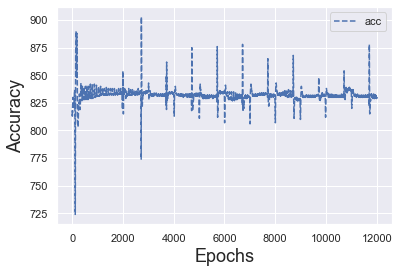

record:2713
record:3698
record:4701
record:5709
record:6708
record:7703
record:8709
record:9711
record:10711
record:11700
[[ 0.00561221  0.00561221 -0.06041377 ...  0.00561221  0.00561221
   0.00561221]
 [-0.16220853 -0.16220853 -0.16220853 ...  0.15741418  0.15741418
   0.15741418]
 [-0.05873282 -0.05873282 -0.05873282 ...  0.04081433  0.14036147
   0.04081433]
 ...
 [ 0.13076513  0.13076513  0.13076513 ... -0.11365567 -0.11365567
  -0.11365567]
 [-0.17791039 -0.38240509 -0.38240509 ...  0.64006842  0.64006842
   0.64006842]
 [ 0.00876986 -0.10085343  0.00876986 ...  0.11839316  0.11839316
   0.11839316]]


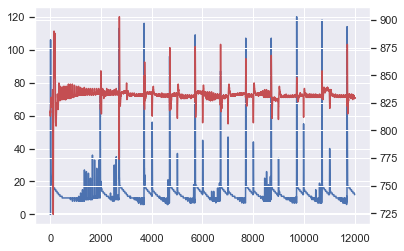

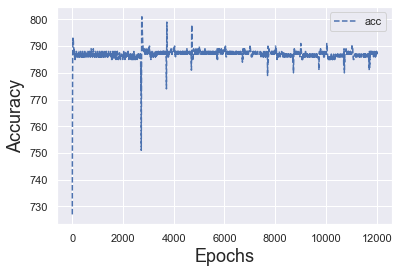

record:2699
record:3706
record:4689
record:5706
record:6699
record:7697
record:8693
record:9716
record:10702
record:11700
[[-0.10057596  0.0137149   0.0137149  ...  0.24229663  0.12800577
   0.24229663]
 [ 0.09049982 -0.17567612 -0.17567612 ...  0.09049982  0.09049982
  -0.17567612]
 [-0.10168985 -0.10168985 -0.10168985 ...  0.62466621  0.62466621
   0.62466621]
 ...
 [ 0.32073219  0.32073219  0.32073219 ...  0.93165065  0.93165065
   0.32073219]
 [-0.08343741 -0.08343741 -0.08343741 ...  0.99317428  0.99317428
   0.99317428]
 [-0.19629316 -0.19629316 -0.19629316 ...  0.41712297  1.0305391
   1.0305391 ]]


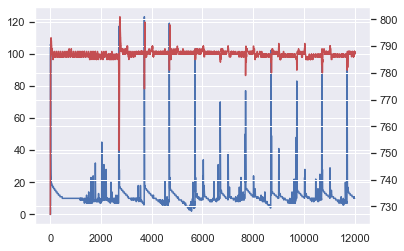

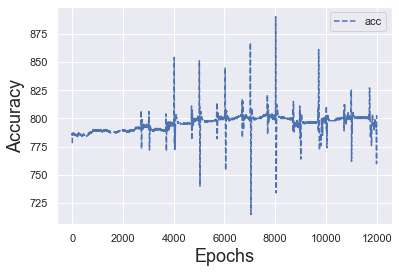

record:2711
record:3692
record:4698
record:5694
record:6694
record:7688
record:8696
record:9694
record:10702
record:11702
[[-0.1460846  -0.1460846   0.05681068 ...  0.46260123  0.46260123
   0.46260123]
 [-0.25786929 -0.05402005 -0.05402005 ...  0.96522615  1.16907539
   1.37292463]
 [-0.03942253 -0.03942253 -0.03942253 ...  0.61761961  0.39860556
   0.61761961]
 ...
 [-0.00363287  0.05225741 -0.00363287 ... -0.50664539 -0.50664539
  -0.56253567]
 [-0.09406472 -0.09406472 -0.09406472 ... -0.74278692 -0.74278692
  -0.74278692]
 [ 0.18479647  0.18479647  0.18479647 ... -1.92454287 -1.74112205
  -1.55770124]]


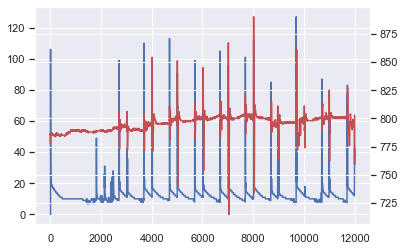

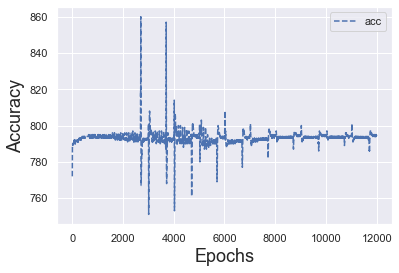

record:2692
record:3701
record:4702
record:5699
record:6691
record:7706
record:8713
record:9699
record:10725
record:11702
[[-0.08866968 -0.01156561 -0.01156561 ... -0.01156561 -0.01156561
  -0.01156561]
 [ 0.36180343  0.27419969  0.27419969 ...  0.09899222  0.01138849
   0.09899222]
 [ 0.08743912  0.08743912  0.08743912 ...  0.33549338  0.33549338
   0.21146625]
 ...
 [ 0.2671239  -0.16027434 -0.16027434 ...  0.69452214  0.69452214
   0.69452214]
 [ 0.28229275  0.28229275  0.28229275 ...  0.95441833  0.95441833
   0.95441833]
 [-0.1522774  -0.1522774  -0.1522774  ...  0.60910959  0.60910959
   0.60910959]]


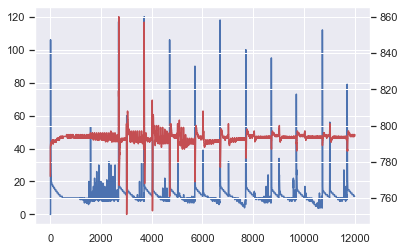

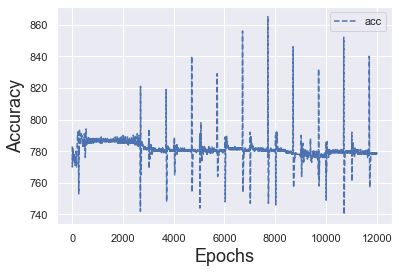

record:2684
record:3688
record:4704
record:5709
record:6705
record:7707
record:8699
record:9390
record:10697
record:11705
[[ 0.28504274  0.16869877  0.16869877 ...  0.05235479  0.05235479
   0.05235479]
 [ 0.01954813  0.11263448  0.01954813 ...  0.20572083  0.20572083
   0.20572083]
 [ 0.10929678  0.02742653  0.02742653 ...  0.02742653  0.02742653
   0.10929678]
 ...
 [ 0.15622081  0.15622081  0.15622081 ...  0.5901675   1.02411419
   0.5901675 ]
 [ 0.13026233  0.13026233  0.0660937  ...  0.00192506  0.00192506
   0.00192506]
 [ 0.07186146  0.07186146  0.07186146 ... -0.01169838  0.07186146
   0.07186146]]


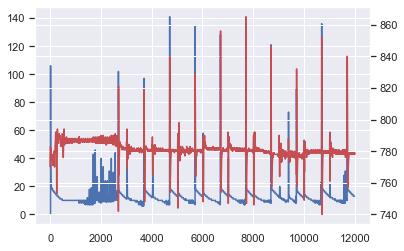

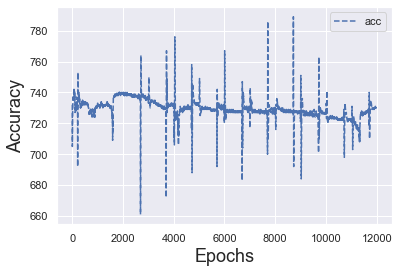

record:2687
record:3697
record:4700
record:5702
record:6692
record:7688
record:8711
record:9696
record:10703
record:11707
[[-0.06072142 -0.06072142  0.01243692 ...  0.08559525  0.08559525
   0.08559525]
 [-0.01803962 -0.01803962 -0.01803962 ...  0.22248868  0.22248868
   0.22248868]
 [-0.02915275 -0.11244633 -0.11244633 ...  0.38731513  0.4706087
   0.38731513]
 ...
 [-0.05818966 -0.05818966 -0.05818966 ...  0.26508621  0.26508621
   0.26508621]
 [-0.08941563 -0.08941563 -0.08941563 ...  0.63754072  0.63754072
   0.63754072]
 [-0.3188009  -0.12960155 -0.3188009  ...  0.24879714  0.24879714
   0.24879714]]


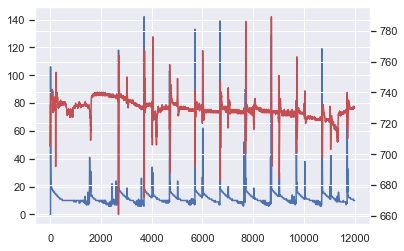

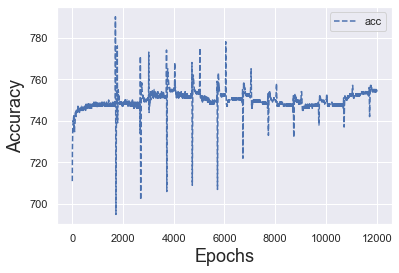

record:2674
record:3709
record:4712
record:5708
record:6705
record:7709
record:8701
record:9712
record:10695
record:11704
[[ 0.142369    0.142369    0.142369   ...  0.39659935  0.39659935
   0.39659935]
 [-0.03823584 -0.03823584 -0.03823584 ...  0.37290225  0.37290225
   0.37290225]
 [ 0.05498667  0.05498667  0.05498667 ...  0.32541293  0.32541293
   0.32541293]
 ...
 [-0.19488546 -0.19488546 -0.19488546 ...  0.6977197   0.6977197
   0.6977197 ]
 [ 0.06436179  0.06436179 -0.24212292 ...  0.98381591  0.6773312
   0.6773312 ]
 [-0.01754051 -0.01754051 -0.01754051 ...  0.62029635  0.62029635
   0.62029635]]


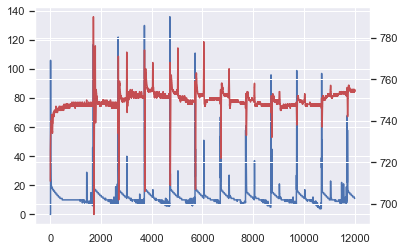

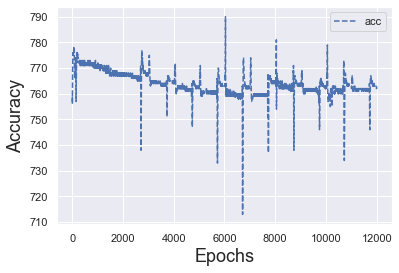

record:2694
record:3725
record:4701
record:5703
record:6703
record:7706
record:8712
record:10698
record:11724
[[-0.03159185 -0.03159185 -0.03159185 ...  0.45443667  0.45443667
   0.45443667]
 [-0.14460051  0.15354487 -0.14460051 ...  0.45169025  0.45169025
   0.45169025]
 [ 0.30762567  0.30762567  0.03539056 ...  0.85209589  0.85209589
   0.85209589]
 ...
 [-0.09215564 -0.09215564 -0.09215564 ...  0.6694612   0.51713783
   0.51713783]
 [ 0.02195219  0.02195219  0.02195219 ...  0.53847438  0.53847438
   0.53847438]
 [-0.00811679 -0.00811679 -0.00811679 ...  0.45569973  0.68760799
   0.45569973]]


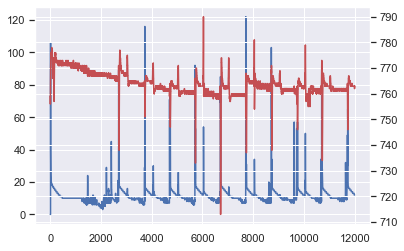

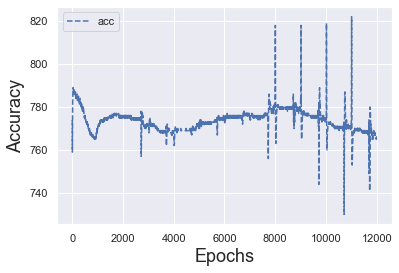

record:2705
record:3706
record:6697
record:7726
record:8710
record:9687
record:10714
record:11697
[[ 0.39691588  0.15708755  0.39691588 ... -0.3225691  -0.3225691
  -0.3225691 ]
 [-0.12632001 -0.12632001 -0.12632001 ...  0.33302549  0.33302549
   0.79237098]
 [ 0.1002458   0.1002458   0.1002458  ...  0.81628724  0.81628724
   0.81628724]
 ...
 [-0.081574   -0.081574   -0.081574   ...  0.19494804  0.19494804
   0.05668702]
 [-0.07348026 -0.07348026 -0.07348026 ...  0.2284934   0.2284934
   0.2284934 ]
 [ 0.02429157  0.02429157  0.02429157 ...  0.02429157  0.02429157
   0.02429157]]


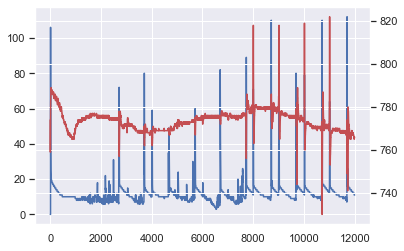

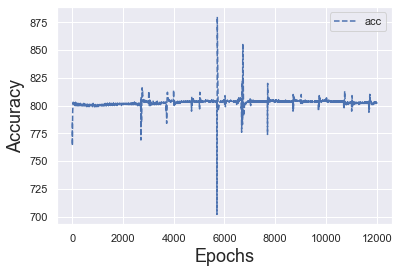

record:2700
record:3700
record:4697
record:5697
record:6661
record:7693
record:8698
record:9703
record:10699
record:11689
[[-0.1284818  -0.00553271 -0.1284818  ...  0.36331455  0.24036547
   0.36331455]
 [ 0.03718709  0.03718709  0.03718709 ...  0.4185931   0.4185931
   0.22789009]
 [-0.26109135 -0.26109135 -0.26109135 ...  0.22692986  0.22692986
   0.22692986]
 ...
 [-0.00763008 -0.00763008 -0.00763008 ... -0.00763008 -0.00763008
  -0.00763008]
 [ 0.18987267 -0.16174338  0.18987267 ... -0.86497548 -0.51335943
  -0.86497548]
 [ 0.0899728  -0.27726312 -0.27726312 ... -0.27726312 -0.27726312
  -0.27726312]]


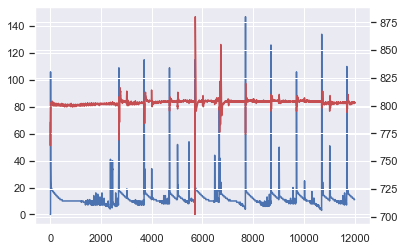

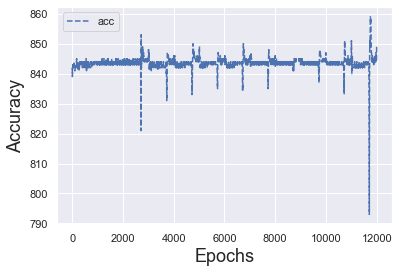

record:2699
record:3723
record:4712
record:5714
record:6707
record:7711
record:8703
record:9715
record:10702
record:11701
[[-0.11740961 -0.11740961 -0.11740961 ...  0.08678102  0.08678102
   0.29097164]
 [-0.28824028 -0.28824028 -0.28824028 ...  0.30000519  0.30000519
   0.30000519]
 [-0.155902   -0.155902   -0.155902   ...  0.37257936  0.37257936
   0.37257936]
 ...
 [ 0.08756952  0.08756952  0.08756952 ...  0.48561277  0.08756952
   0.48561277]
 [ 0.0939325   0.0939325   0.0939325  ...  0.39213089  0.39213089
   0.39213089]
 [-0.14272626 -0.14272626 -0.14272626 ...  0.23535655  0.14083585
   0.14083585]]


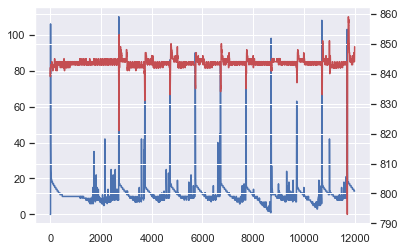

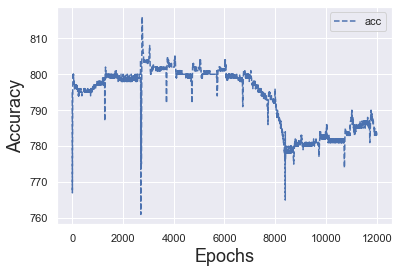

record:2695
record:3704
record:4707
record:5687
record:6714
record:9719
record:10716
record:11727
[[-0.08323473 -0.08323473 -0.08323473 ...  0.57511907  0.57511907
   0.57511907]
 [-0.04254463 -0.04254463 -0.04254463 ...  0.66653258  0.66653258
   0.66653258]
 [-0.1762674  -0.1762674  -0.1762674  ...  0.99884859  0.99884859
   0.99884859]
 ...
 [-0.19015269 -0.19015269 -0.19015269 ...  1.12124518  1.12124518
   1.12124518]
 [-0.24687801 -0.24687801 -0.24687801 ...  0.91036267  0.91036267
   0.91036267]
 [-0.19999147 -0.19999147 -0.19999147 ...  0.78762071  0.78762071
   0.78762071]]


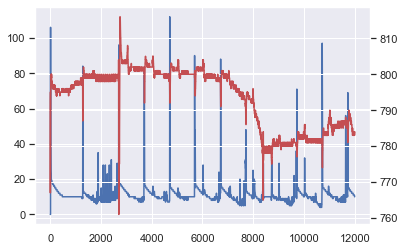

Feature Extraction:   0%|          | 0/15 [00:00<?, ?it/s]

(191, 200)


Feature Extraction: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]


     0__variance_larger_than_standard_deviation  0__has_duplicate_max  \
0                                           1.0                   1.0   
1                                           0.0                   0.0   
2                                           0.0                   1.0   
3                                           0.0                   0.0   
4                                           0.0                   0.0   
..                                          ...                   ...   
186                                         0.0                   1.0   
187                                         0.0                   1.0   
188                                         1.0                   1.0   
189                                         0.0                   1.0   
190                                         0.0                   0.0   

     0__has_duplicate_min  0__has_duplicate  0__sum_values  0__abs_energy  \
0                     0.0               1.0   

E:\anaconda\envs\keras-gpu\lib\site-packages\tsfresh\utilities\dataframe_functions.py:172: RuntimeWarning: The columns ['0__friedrich_coefficients__coeff_0__m_3__r_30'
 '0__friedrich_coefficients__coeff_1__m_3__r_30'
 '0__friedrich_coefficients__coeff_2__m_3__r_30'
 '0__friedrich_coefficients__coeff_3__m_3__r_30'
 '0__max_langevin_fixed_point__m_3__r_30'] did not have any finite values. Filling with zeros.
  df.iloc[:, np.where(is_col_non_finite)[0]].columns.values), RuntimeWarning)


TypeError: select_features() got an unexpected keyword argument 'multiclass'

In [8]:
with tf.device('/device:GPU:0'): #GPU使用
    
    def make_all_ppg_array(data,original_data):#120秒分の脈波を取り出し
        time=0
        for line in original_data:

            if time < 12000 :
                data[time] = int(line.split()[3])#何列目とってくるか
                time += 1
                
        return data


    def Anomaly_Detection(ppg,answer,label,data_type):

        data =np.zeros((12000),int)#データ格納用
        det_data = np.zeros((0,det_data_len),int)#検知データ格納用
        sub_det_data = np.zeros((det_data_len),int) #切り出した検知データ格納用
        det_data_num = 0 #データ数を数えるため


        data = make_all_ppg_array(data,ppg)

        #確認のためとりあえず描画
        plt.plot(data, linestyle = "dashed" , label="acc")
        plt.xlabel('Epochs',fontsize = 18)
        plt.ylabel('Accuracy',fontsize = 18)
        plt.legend()
        plt.tick_params()
        plt.show()

        cf = changefinder.ChangeFinder(r=0.01, order=1, smooth=7)#変化点検知にChangeFinder使用

        score = np.zeros((12000),int)#異常度格納用
        score_num = 0 #score index
        for i in data:
            sub_score = cf.update(i)
            score[score_num] = sub_score
            score_num += 1

        
        det_time=0 #sub_det_data index
        wait_F = 0 #ジェスチャ終了時の異常度の山を無視するため
        wait_time = 0
        for t in range(0,len(score)):
            if score[t] > 60 and wait_time == 0 and t>2000: #20秒以降で異常度の閾値を60に
                print(f"record:{t}")
                for k in range(t-100,t+100):
                    sub_det_data[det_time] = data[k]
                    det_time += 1
                det_time = 0
                sub_det_data = preproc.scale(sub_det_data)   #検出したデータを標準化
                det_data = np.r_[det_data,sub_det_data.reshape(1,-1)] #det_dataに検知したデータを追加
                answer_list.append(answer)
                label_list.append(label)
                wait_time = 1
                if data_type == "train" :
                    det_data_num += 1
            elif wait_time != 0 :
                wait_time += 1
                if wait_time > 500 : #5秒間何もしない
                    wait_time = 0

        print(det_data) #確認用



        # 異常度をプロット
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(score)
        ax2 = ax.twinx()
        ax2.plot(data,'r')
        plt.show()
        
        return det_data,det_data_num

    det_data_len = 200 #切り出すデータの長さ
    get_data = np.zeros((10,det_data_len),int)
    train_data_num = 0
    data_num = 0
    answer_list = [] #ジェスチャ名格納用
    label_list = []  #ジェスチャのラベル格納用
    train_label_list = []
    test_label_list = []
    
    with open("gu_sampling100ms_relax7s_act3s_2byte.txt") as ppg:
        new_data , data_num = Anomaly_Detection(ppg,"gu",0,"train")
        get_data = new_data
        train_data_num += data_num
    
    with open("choki_sampling100ms_relax7s_act3s_2byte.txt") as ppg:
        new_data , data_num = Anomaly_Detection(ppg,"choki",1,"train")
        get_data = np.concatenate([get_data,new_data],0)
        train_data_num += data_num
        
    with open("par_sampling100ms_relax7s_act3s_2byte.txt") as ppg:
        new_data , data_num = Anomaly_Detection(ppg,"par",2,"train")
        get_data = np.concatenate([get_data,new_data],0)
        train_data_num += data_num
        
    with open("one3.txt") as ppg:
        new_data , data_num = Anomaly_Detection(ppg,"one",3,"train")
        get_data = np.concatenate([get_data,new_data],0)
        train_data_num += data_num
        
    with open("three_sampling100ms_relax7s_act3s_2byte.txt") as ppg:
        new_data , data_num = Anomaly_Detection(ppg,"three",4,"train")
        get_data = np.concatenate([get_data,new_data],0)
        train_data_num += data_num
        
    with open("four_sampling100ms_relax7s_act3s_2byte.txt") as ppg:
        new_data , data_num = Anomaly_Detection(ppg,"four",5,"train")
        get_data = np.concatenate([get_data,new_data],0)
        train_data_num += data_num
        
    with open("fox_sampling100ms_relax7s_act3s_2byte.txt") as ppg:
        new_data , data_num = Anomaly_Detection(ppg,"fox",6,"train")
        get_data = np.concatenate([get_data,new_data],0)
        train_data_num += data_num
        
    with open("phone_sampling100ms_relax7s_act3s_2byte.txt") as ppg:
        new_data , data_num = Anomaly_Detection(ppg,"phone",7,"train")
        get_data = np.concatenate([get_data,new_data],0)
        train_data_num += data_num
        
    with open("good3.txt") as ppg:
        new_data , data_num = Anomaly_Detection(ppg,"good",8,"train")
        get_data = np.concatenate([get_data,new_data],0)
        train_data_num += data_num
        
    with open("koyubirev_sampling100ms_relax7s_act3s_2byte.txt") as ppg:
        new_data , data_num = Anomaly_Detection(ppg,"koyubi",9,"train")
        get_data = np.concatenate([get_data,new_data],0)
        train_data_num += data_num
        
    with open("gu2rev_sampling100ms_relax7s_act3s_2byte.txt") as ppg:
        new_data , data_num = Anomaly_Detection(ppg,"gu",0,"test")
        get_data = np.concatenate([get_data,new_data],0)
        train_data_num += data_num
        
    with open("choki2rev_sampling100ms_relax7s_act3s_2byte.txt") as ppg:
        new_data , data_num = Anomaly_Detection(ppg,"choki",1,"test")
        get_data = np.concatenate([get_data,new_data],0)
        train_data_num += data_num
        
    with open("par2_sampling100ms_relax7s_act3s_2byte.txt") as ppg:
        new_data , data_num = Anomaly_Detection(ppg,"par",2,"test")
        get_data = np.concatenate([get_data,new_data],0)
        train_data_num += data_num
        
        
    with open("one2_sampling100ms_relax7s_act3s_2byte.txt") as ppg:
        new_data , data_num = Anomaly_Detection(ppg,"one",3,"test")
        get_data = np.concatenate([get_data,new_data],0)
        train_data_num += data_num
        
    with open("three2_sampling100ms_relax7s_act3s_2byte.txt") as ppg:
        new_data , data_num = Anomaly_Detection(ppg,"three",4,"test")
        get_data = np.concatenate([get_data,new_data],0)
        train_data_num += data_num
        
    with open("four2_sampling100ms_relax7s_act3s_2byte.txt") as ppg:
        new_data , data_num = Anomaly_Detection(ppg,"four",5,"test")
        get_data = np.concatenate([get_data,new_data],0)
        train_data_num += data_num
        
    with open("fox2_sampling100ms_relax7s_act3s_2byte.txt") as ppg:
        new_data , data_num = Anomaly_Detection(ppg,"fox",6,"test")
        get_data = np.concatenate([get_data,new_data],0)
        train_data_num += data_num
        
    with open("phone2rev_sampling100ms_relax7s_act3s_2byte.txt") as ppg:
        new_data , data_num = Anomaly_Detection(ppg,"phone",7,"test")
        get_data = np.concatenate([get_data,new_data],0)
        train_data_num += data_num
        
    with open("good2rev_sampling100ms_relax7s_act3s_2byte.txt") as ppg:
        new_data , data_num = Anomaly_Detection(ppg,"good",8,"test")
        get_data = np.concatenate([get_data,new_data],0)
        train_data_num += data_num
        
    with open("koyubi2_sampling100ms_relax7s_act3s_2byte.txt") as ppg:
        new_data , data_num = Anomaly_Detection(ppg,"koyubi",9,"test")
        get_data = np.concatenate([get_data,new_data],0)
        train_data_num += data_num
        
    train_label_list = label_list[:train_data_num]
    test_label_list = label_list[train_data_num:]
    
    np_label_list = np.array(label_list,dtype=int)   #numpy配列に変換
    np_train_label_list = np.array(train_label_list,dtype=int)
    np_test_label_list = np.array(test_label_list,dtype=int)
    
    print(get_data.shape)
    
    #Tsfresh用にDataFrameに変換
    get_data_df = pd.DataFrame(get_data)
    
    Ts_get_data_df = pd.DataFrame({0: get_data_df[:len(get_data)].values.flatten(),
                                   1: np.arange(len(get_data)).repeat(get_data_df.shape[1])})
    
    get_data_features_df = extract_features(Ts_get_data_df, column_id=1)   #特徴量抽出
    
    get_data_features_df = impute(get_data_features_df)    #Nanなどを補間
    
    get_data_features_df=get_data_features_df.drop(columns=get_data_features_df.select_dtypes(include='object').columns)     #数値以外の物を除去
    
    print(get_data_features_df)
    print(np_label_list.shape)
    selected_get_data_fea = select_features(get_data_features_df,np_label_list,multiclass=True,n_significant=10)
    
    get_data_features = selected_get_data_fea.values
    
    train_data_features = get_data_features[:train_data_num,:]
    test_data_features = get_data_features[train_data_num:,:]
        
    print(train_data_features.shape)
    print(test_data_features.shape)

    
    #k分割交差検証
    kf = StratifiedKFold(n_splits=5, shuffle=True,random_state=0)

    for train_index, eval_index in kf.split(train_data_features,np_train_label_list):
        X_train, X_test = train_data_features[train_index], train_data_features[eval_index]
        Y_train, Y_test = np_train_label_list[train_index], np_train_label_list[eval_index]
        
        accuracy_list = []
        sns.set()
        k_range = range(1, 9)
        for k in k_range: #kの値を変えながらk-NNの精度検証
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train, Y_train)
            Y_pred = knn.predict(X_test)
            test_result = knn.predict(test_data_features)
            accuracy_list.append(metrics.accuracy_score(Y_test, Y_pred))
            print(f"k={k}:validation")
            print(confusion_matrix(Y_test,Y_pred)) #混同行列を作成
            print(f"k={k}:test")
            print(confusion_matrix(test_label_list,test_result))
            print(metrics.accuracy_score(Y_test,Y_pred))
            print(metrics.accuracy_score(np_test_label_list,test_result))
        
        #精度の変化を描画
        figure = plt.figure()
        ax = figure.add_subplot(111)
        ax.plot(k_range, accuracy_list)
        ax.set_xlabel('k-nn')
        ax.set_ylabel('accuracy')
        plt.show()